In [ ]:
import pandas as pd
df = pd.read_csv('/content/COVID clinical trials.csv')

In [ ]:
print(df.head())

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [ ]:
print(df.describe())

              Rank    Enrollment
count  5783.000000  5.749000e+03
mean   2892.000000  1.831949e+04
std    1669.552635  4.045437e+05
min       1.000000  0.000000e+00
25%    1446.500000  6.000000e+01
50%    2892.000000  1.700000e+02
75%    4337.500000  5.600000e+02
max    5783.000000  2.000000e+07


In [ ]:
print(df.describe(include='object'))

         NCT Number                                              Title  \
count          5783                                               5783   
unique         5783                                               5775   
top     NCT04785898  Study Assessing Vagus Nerve Stimulation in CoV...   
freq              1                                                  2   

         Acronym      Status         Study Results Conditions  \
count       2480        5783                  5783       5783   
unique      2338          12                     2       3067   
top     COVID-19  Recruiting  No Results Available   COVID-19   
freq          47        2805                  5747        720   

                 Interventions Outcome Measures  \
count                     4897             5748   
unique                    4337             5687   
top     Other: No intervention        Mortality   
freq                        32                5   

                          Sponsor/Collaborators

In [ ]:
print(df.isnull().sum())

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64


In [ ]:
df = df.drop(columns=['Acronym', 'Study Documents'])
df['Results First Posted'].fillna('Unknown', inplace=True)

<ipython-input-11-15e2420451ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Results First Posted'].fillna('Unknown', inplace=True)


In [ ]:
print(df['Status'].value_counts())

Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


<Axes: title={'center': 'Status of Clinical Trials'}, xlabel='Status'>

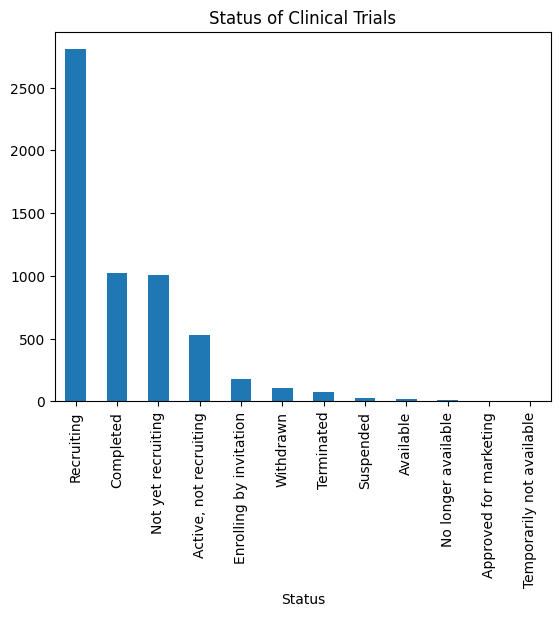

In [ ]:
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')

In [ ]:
print(df['Phases'].value_counts())

Phases
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

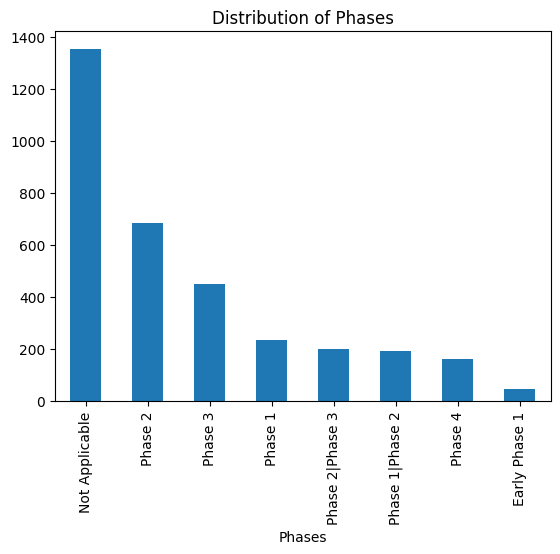

In [ ]:
df['Phases'].value_counts().plot(kind='bar', title='Distribution of Phases')

In [ ]:
status_phase = pd.crosstab(df['Status'], df['Phases'])
print(status_phase)

Phases                   Early Phase 1  Not Applicable  Phase 1  \
Status                                                            
Active, not recruiting               7             111       44   
Completed                            3             226       38   
Enrolling by invitation              4              54        1   
Not yet recruiting                   5             282       42   
Recruiting                          22             647       98   
Suspended                            2               2        0   
Terminated                           0              13        4   
Withdrawn                            3              19        7   

Phases                   Phase 1|Phase 2  Phase 2  Phase 2|Phase 3  Phase 3  \
Status                                                                        
Active, not recruiting                26       81               15       59   
Completed                             17       78               20       56   
Enrolling by 

<Axes: title={'center': 'Status vs. Phases'}, xlabel='Status'>

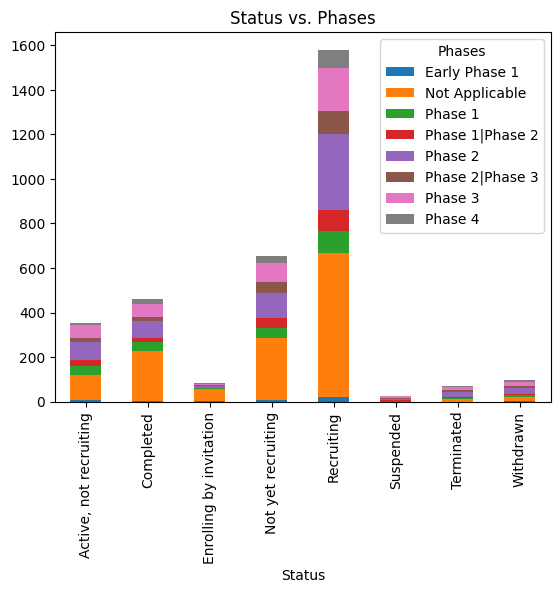

In [ ]:
status_phase.plot(kind='bar', stacked=True, title='Status vs. Phases')

In [ ]:
df['Outcome Measures'] = df['Outcome Measures'].astype(str)
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x)).reset_index()
print(conditions_outcomes)

                                             Conditions  \
0                                2019 Novel Coronavirus   
1                      2019 Novel Coronavirus Infection   
2     2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                      2019 Novel Coronavirus Pneumonia   
4             2019 Novel Coronavirus Pneumonia|COVID-19   
...                                                 ...   
3062                  the Lung Complication of COVID-19   
3063  the Prognostic Value of Ferritin|Glycosylated ...   
3064  the Study Focus on the Uses of Telephone and O...   
3065  the Use of Modern Technology Applications in H...   
3066  to Predict an Unfavorable Evolution of Covid-1...   

                                       Outcome Measures  
0     Proportion of participants who improve by at l...  
1     new-onset COVID-19|Number of Participants with...  
2     Number of participants with treatment emergent...  
3     Clinical recovery time|Complete fever time|Cou...  
4

In [ ]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

<Axes: title={'center': 'Trials Started Over Time'}, xlabel='Start Date'>

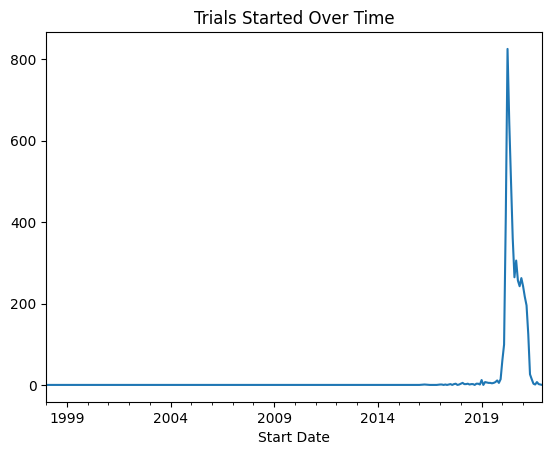

In [ ]:
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind= 'line', title='Trials Started Over Time')